# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer.shape

(699, 11)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [31]:
cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer.isnull().values.any()

False

In [7]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer['Bare Nuclei'].str.count('\?').value_counts()

0    683
1     16
Name: Bare Nuclei, dtype: int64

In [8]:
cancer['Bare Nuclei'].replace('?', np.nan, inplace= True)

In [9]:
cancer['Bare Nuclei'].fillna(cancer['Bare Nuclei'].median(), inplace=True)

In [10]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype('int64')

In [11]:
cancer['Bare Nuclei'].isnull().values.any()

False

In [12]:
cancer.drop_duplicates(inplace=True)

In [13]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation & pairplots. 


In [15]:
# Check for correlation of variable

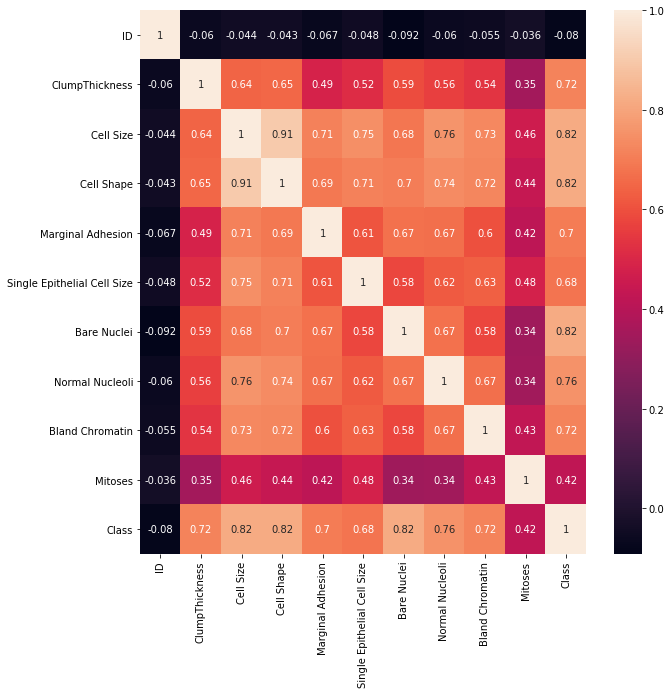

In [16]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

corr = cancer.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [17]:
# Id columns is to identify rows hence can be skipped in analysis

cancer.drop(['ID'], axis=1, inplace=True)

In [18]:
cancer.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


D:\Softwares\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Softwares\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Softwares\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Softwares\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


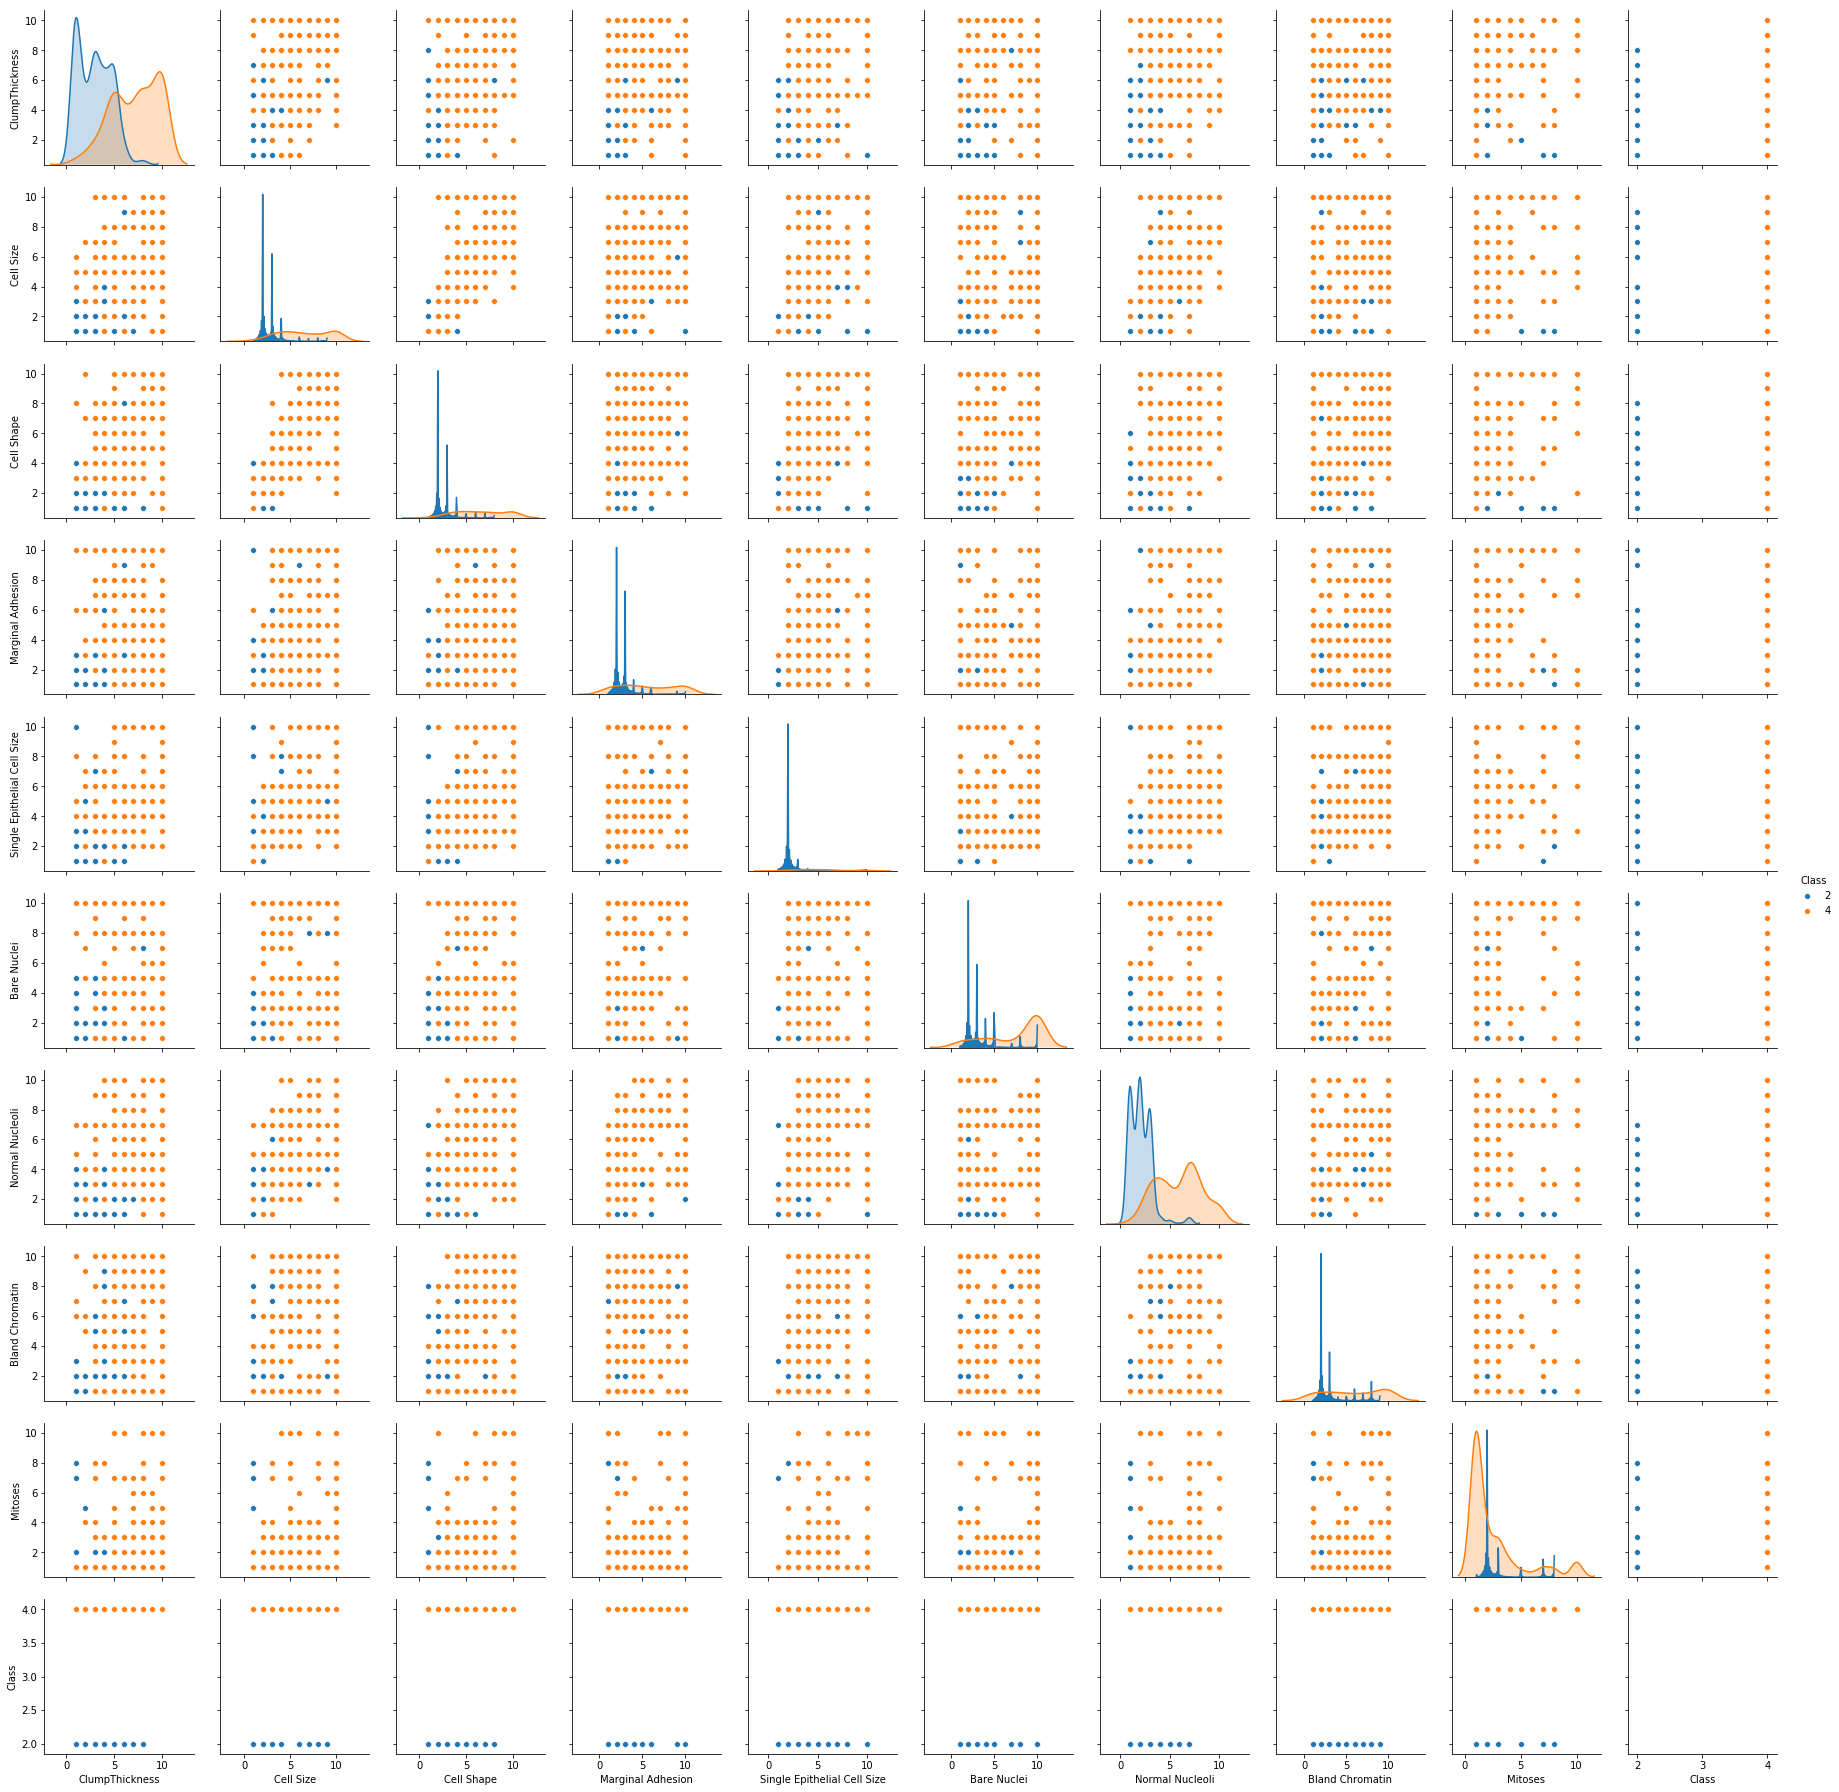

In [19]:
#Let us check for pair plots
sns.pairplot(cancer, diag_kind='kde', hue='Class')

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [20]:
X = cancer.drop("Class", axis=1)
Y = cancer["Class"] 

In [21]:
from scipy.stats import zscore
X = X.apply(zscore)

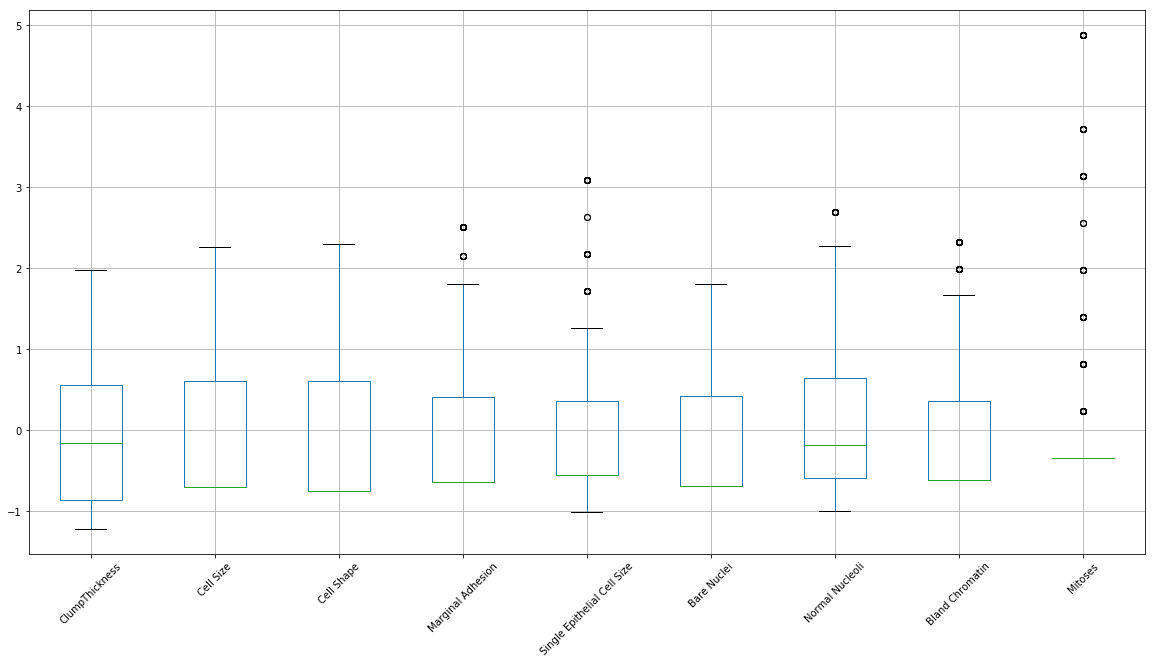

In [23]:
X.boxplot(figsize = (20,10), rot=45)

# Q6 Create a covariance matrix for identifying Principal components

In [24]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)

In [25]:
cov_matrix

array([[1.00145138, 0.64410677, 0.65453792, 0.48842317, 0.51800374,
        0.59150555, 0.56187702, 0.53628373, 0.35070402],
       [0.64410677, 1.00145138, 0.9066632 , 0.71396807, 0.74806589,
        0.68556472, 0.76073447, 0.7281282 , 0.46058509],
       [0.65453792, 0.9066632 , 1.00145138, 0.6917849 , 0.71527957,
        0.70518656, 0.73964761, 0.72557104, 0.44107467],
       [0.48842317, 0.71396807, 0.6917849 , 1.00145138, 0.60916409,
        0.67348849, 0.67083263, 0.60310209, 0.41761286],
       [0.51800374, 0.74806589, 0.71527957, 0.60916409, 1.00145138,
        0.58132945, 0.62142658, 0.63480034, 0.48321685],
       [0.59150555, 0.68556472, 0.70518656, 0.67348849, 0.58132945,
        1.00145138, 0.67373075, 0.57900023, 0.34332099],
       [0.56187702, 0.76073447, 0.73964761, 0.67083263, 0.62142658,
        0.67373075, 1.00145138, 0.67006996, 0.34426827],
       [0.53628373, 0.7281282 , 0.72557104, 0.60310209, 0.63480034,
        0.57900023, 0.67006996, 1.00145138, 0.42811085],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [28]:
print(eigenvalues)
print(eigenvectors)

[5.90854977 0.77705689 0.5408396  0.09047225 0.466405   0.26349648
 0.30188725 0.29351972 0.37083545]
[[-0.30202869  0.14902209 -0.86872874 -0.00254656 -0.02905197  0.26616691
  -0.19399832 -0.1501391  -0.00300703]
 [-0.38089144  0.04833557  0.03657788 -0.73669737  0.18962075 -0.43946502
  -0.23349186  0.09850317  0.12335951]
 [-0.37721125  0.08333455 -0.02039666  0.66430356  0.16770378 -0.58940349
  -0.15127833  0.06480163  0.08028927]
 [-0.33430954  0.05023423  0.39037637  0.04590901 -0.48684422  0.19404134
  -0.4924605  -0.46232255 -0.0168367 ]
 [-0.33589151 -0.17389022  0.15761632  0.06657451  0.32855055  0.38975065
   0.21090367 -0.06957883  0.72006348]
 [-0.33284901  0.24716817 -0.0294455  -0.07105867 -0.55680581 -0.15915546
   0.69544634  0.01237327  0.05514693]
 [-0.34648894  0.22989544  0.18320773  0.06252437  0.00966191  0.39882942
  -0.12659342  0.73810848 -0.26387659]
 [-0.3364694  -0.02071698  0.1357351  -0.02018486  0.47674458  0.1133626
   0.31256571 -0.41188028 -0.60004

# Q8 Find variance and cumulative variance by each eigen vector

In [29]:
total = sum(eigenvalues)
explained_variance = [(i / total) for i in sorted(eigenvalues, reverse=True)]  
print(explained_variance)

[0.6555540722487829, 0.08621452475199615, 0.06000619698175495, 0.051747672452918364, 0.041144223042681956, 0.03349441464955822, 0.03256603710118629, 0.029234955723370166, 0.010037903047751129]


In [30]:
cum_var_exp = np.cumsum(explained_variance)
print(cum_var_exp)

[0.65555407 0.7417686  0.80177479 0.85352247 0.89466669 0.9281611
 0.96072714 0.9899621  1.        ]


In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
cumsum

array([ 65.55540722,  74.1768597 ,  80.1774794 ,  85.35224664,
        89.46666895,  92.81611041,  96.07271412,  98.9962097 ,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

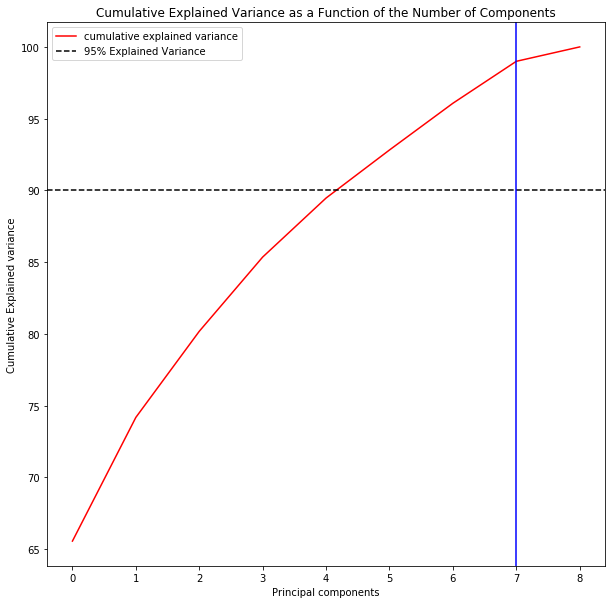

In [49]:
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '95% Explained Variance')
plt.axvline(7, c='b')
plt.legend(loc='best')

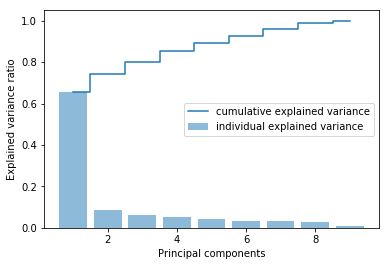

In [39]:
plt.bar(range(1,10), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [50]:
pca = PCA(n_components=7)
pcaTransform = pca.fit_transform(X_std)
pcadf = pd.DataFrame(data=pcaTransform, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [51]:
pcadf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.462194,-0.112557,-0.578524,0.032024,-0.098578,0.220789,0.238263
1,1.464935,-0.528243,0.311062,-0.774376,1.659609,-1.021133,-0.505880
2,-1.584665,-0.075076,0.030469,-0.101388,-0.081185,-0.109434,0.348344
3,1.502071,-0.559479,-0.538235,1.475429,-0.426948,-0.099689,-0.262490
4,-1.336156,-0.094684,0.002493,-0.297430,-0.109261,0.495574,-0.031067


# Q10 Find correlation between components and features

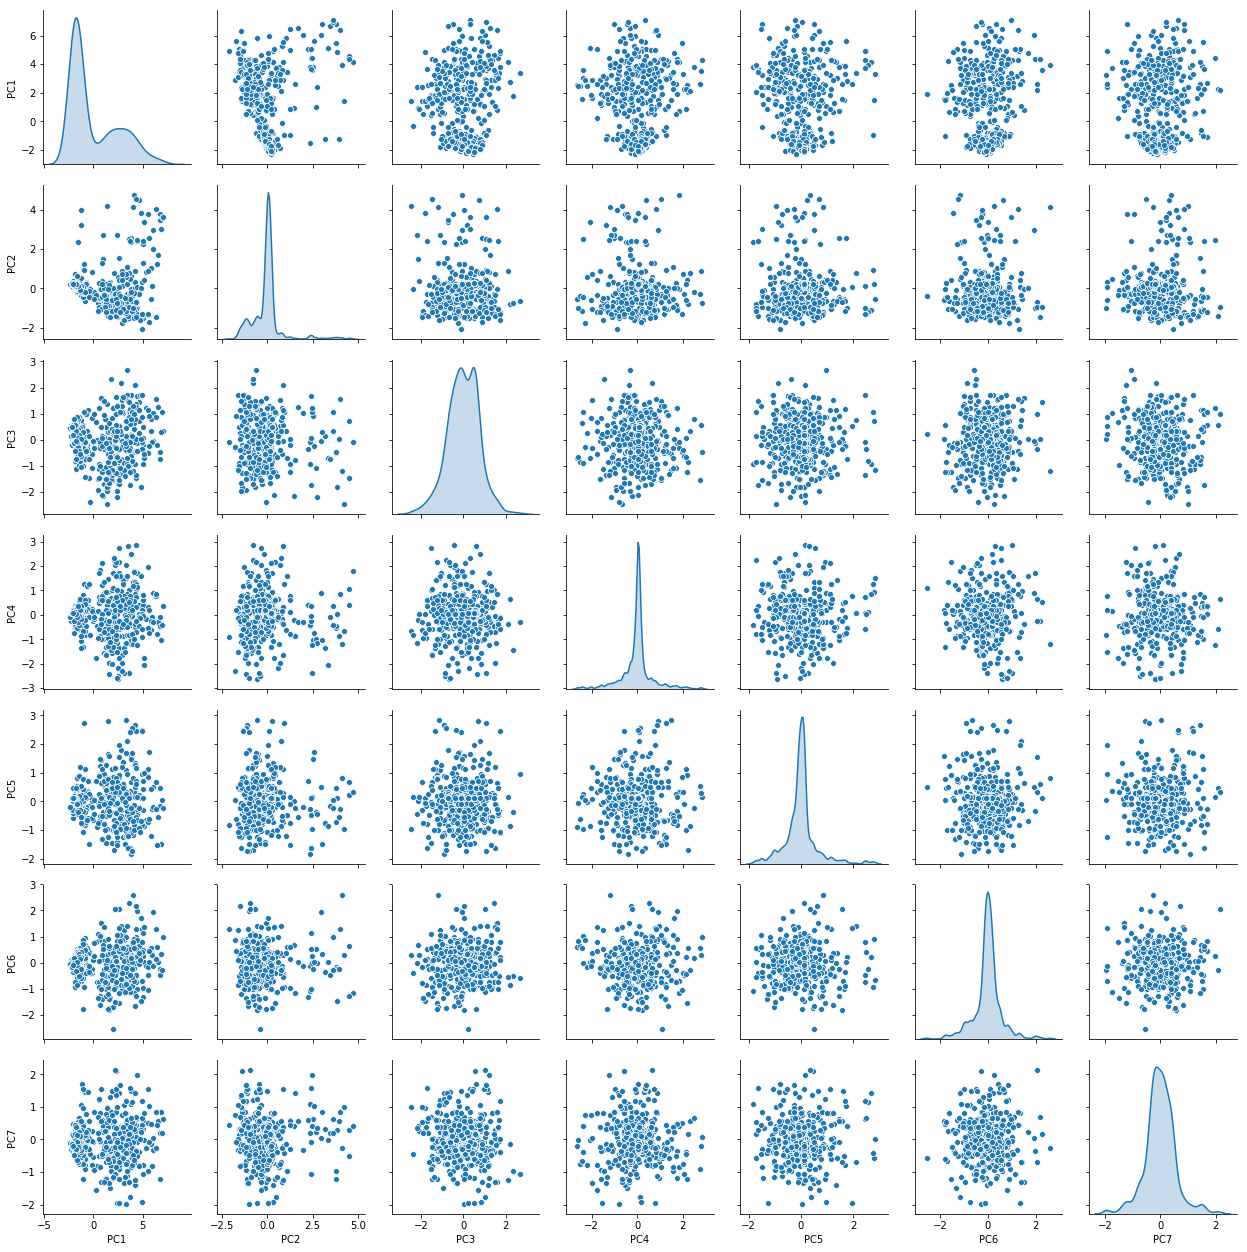

In [54]:
sns.pairplot(pcadf, diag_kind='kde')

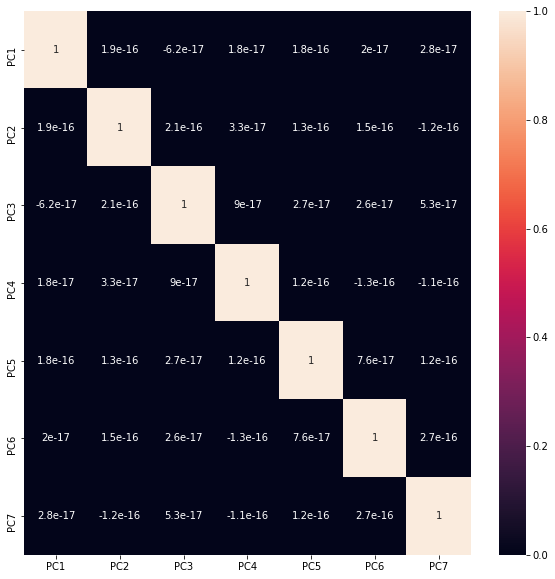

In [55]:
corr = pcadf.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)